## <b>POWER TRANFOMER</b>
Continued of the function transformer

<u><b>Some power transfomers are:</b></u>
* Box-Cox transformer
* Yeo-Jhonson transfomer

In [227]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

### 1. Box-cox transformer
$$
x_i^{(\lambda)} = 
    \begin{cases}
        \frac{x_i^{\lambda} - 1}{\lambda} & \text{if } \lambda \neq 0 \\
        \ln(x_i) & \text{if } \lambda = 0
    \end{cases}
$$
Here $\lambda$ varies from -5 to 5 and in the process of seraching we examine all the values of $\lambda$. Finally we choose the optimal value of the lambda. To examine the value of the $\lambda$ we use maximum likeklihood estimation.

### 2. Yeo-Jhonson Transform
$$
x_i^{(\lambda)}=
    \begin{cases}
        [(x_i+1)^{\lambda}-1]/\lambda & \text{if} \lambda \neq 0, x_i\geq 0 \\
        \ln(x_i)+1 & \text{if} \lambda=0, x_i\geq 0\\
        -[(-x_i+1)^{2-\lambda}-1]/(2-\lambda) & \text{if} \lambda \neq 2, x_i<0\\
        -\ln{(-x_i+1)} & \text{if} \lambda =2, x_i<0
    \end{cases}
$$
This is the adjustment to the box-cox transformation to use for the negetive value of the x.

In [228]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [229]:
data=pd.read_csv('data/insurance.csv')

In [230]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [231]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline

In [232]:
X=data.drop(columns=['charges'])

In [233]:
Y=data['charges']

In [234]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [235]:
x_train.head()

,age,sex,bmi,children,smoker,region
621,37,male,34.100,4,yes,southwest
194,18,male,34.430,0,no,southeast
240,23,female,36.670,2,yes,northeast
1168,32,male,35.200,2,no,southwest
1192,58,female,32.395,1,no,northeast


In [236]:
def plotter(col_name):
    plt.figure(figsize=(5,4))
    plt.subplot(121)
    sns.kdeplot(data=data,x=col_name)
    plt.title('kde plot')
    
    plt.subplot(122)
    stats.probplot(data[col_name],dist='norm',plot=plt)
    plt.title('q-q plot')
    
    plt.suptitle(f'{col_name} plotting')
    plt.tight_layout()
    plt.show()
    


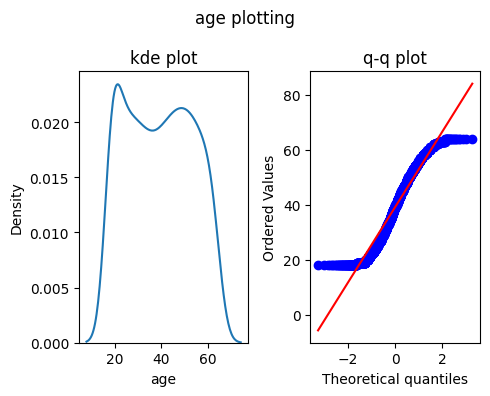

In [237]:
plotter('age')

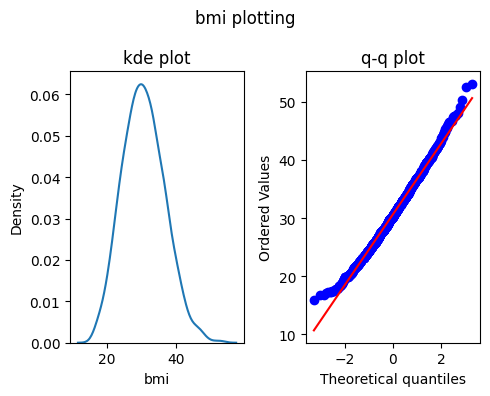

In [238]:
plotter('bmi')

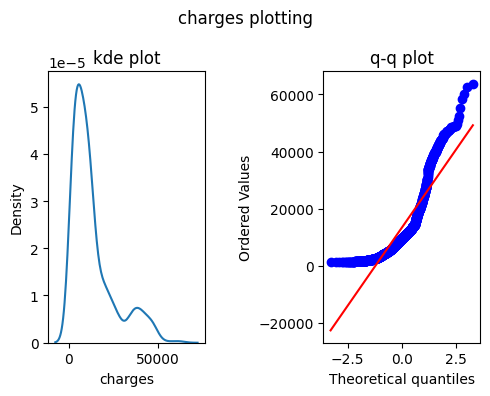

In [239]:
plotter('charges')

In [240]:
#feature encoder
tf1=ColumnTransformer(transformers=[
    ('ohe_sex',OneHotEncoder(drop='first',sparse_output=False),['sex']),
    ('ohe_smoker',OneHotEncoder(drop='first',sparse_output=False),['smoker']),
    ('ohe_region',OneHotEncoder(drop='first',sparse_output=False),['region'])

],remainder='passthrough')

In [241]:
le=LinearRegression()


In [242]:
pipe=make_pipeline(tf1,le)

In [243]:
pipe.fit(x_train,y_train)

C:\Users\Acer\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('linearregression', LinearRegression())])

In [244]:
y_pred=pipe.predict(x_test)

In [245]:
print(r2_score(y_test,y_pred=y_pred))

0.7999876970680432


In [246]:
print(np.mean(cross_val_score(pipe,X,Y,cv=10,scoring='r2')))

0.7445006998667604


In [247]:
tf_combined = ColumnTransformer(transformers=[
    ('pt', PowerTransformer(method='box-cox'), ['age', 'bmi']),
    ('ohe_sex', OneHotEncoder(drop='first', sparse_output=False), ['sex']),
    ('ohe_smoker', OneHotEncoder(drop='first', sparse_output=False), ['smoker']),
    ('ohe_region', OneHotEncoder(drop='first', sparse_output=False), ['region'])
])


In [248]:
pipe2=make_pipeline(tf_combined,LinearRegression())

In [249]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pt',
                                                  PowerTransformer(method='box-cox'),
                                                  ['age', 'bmi']),
                                                 ('ohe_sex',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['sex']),
                                                 ('ohe_smoker',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['smoker']),
                                                 ('ohe_region',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['region'])])),
                ('linearregression', LinearRegression())])

In [250]:
y_pred=pipe.predict(x_test)

In [251]:
pipe=make_pipeline(tf_combined,LinearRegression())
print(np.mean(cross_val_score(pipe,X,Y,cv=10,scoring='r2')))

0.7417864723660272


Text(0.5, 1.0, 'Transformed AGE')

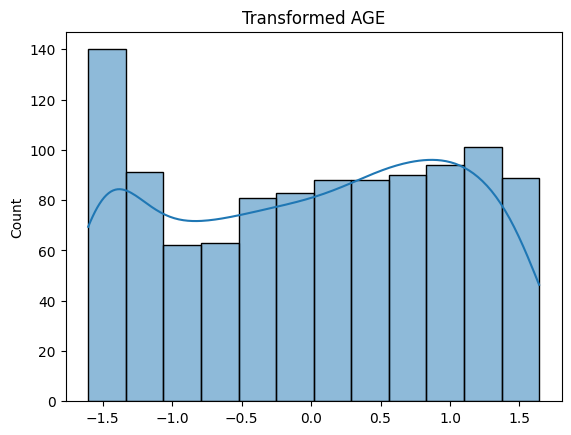

In [253]:
pt = PowerTransformer(method='box-cox')
x_transformed = pt.fit_transform(x_train[['age', 'bmi']])
sns.histplot(x_transformed[:, 0], kde=True)
plt.title("Transformed AGE")


The reason that the model performance degrade was that after the power transformer the age which was initially bimodular will not be converted to the noraml distributio so now let's apply yeo-jhonson transform without the tranforming age.

In [259]:
tf_combined = ColumnTransformer(transformers=[
    ('pt', PowerTransformer(), ['bmi']),
    ('ohe_sex', OneHotEncoder(drop='first', sparse_output=False), ['sex']),
    ('ohe_smoker', OneHotEncoder(drop='first', sparse_output=False), ['smoker']),
    ('ohe_region', OneHotEncoder(drop='first', sparse_output=False), ['region'])
])


In [260]:
pipe2=make_pipeline(tf_combined,LinearRegression())
print(np.mean(cross_val_score(pipe2,X,Y,cv=5,scoring='r2')))

0.6581608120467074


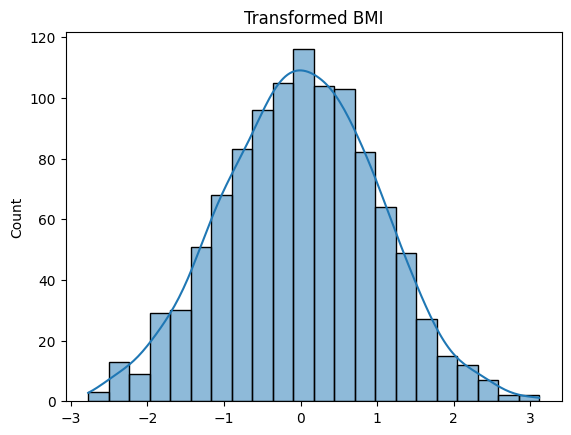

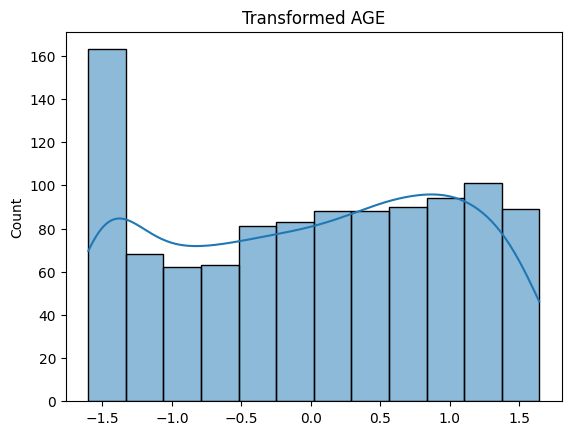

In [264]:
pt = PowerTransformer(method='yeo-johnson')
x_transformed = pt.fit_transform(x_train[['age', 'bmi']])
sns.histplot(x_transformed[:, 1], kde=True)
plt.title("Transformed BMI")
plt.show()
sns.histplot(x_transformed[:, 0], kde=True)
plt.title("Transformed AGE")
plt.show()
